# Analysis of Queen Margrethe II's New Year's speeches, 2010-2019

This analysis was made to study the words most used by Queen Margrethe II of Denmark in her year-end speeches. Its sole purpose was to profit from hints on sports betting sites, there is no political, economic or social interest here.

In [44]:
## Importing the needed libraries
# Scraping
import requests
from bs4 import BeautifulSoup

# NLP
import nltk
import collections
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# Dataviz
import matplotlib.pyplot as plt
import matplotlib.figure as fig
from wordcloud import WordCloud

In [45]:
# Defining the data sources and downloading some requirements
allLinks = ['https://kongehuset.dk/en/news/the-new-years-address-2019',
            'https://kongehuset.dk/en/news/her-majesty-the-queens-new-year-address-2018',
            'https://kongehuset.dk/en/news/her-majesty-the-queens-new-year-address-2017',
            'https://kongehuset.dk/en/news/her-majesty-the-queens-new-year-address-2016',
            'https://kongehuset.dk/node/39601',
            'https://kongehuset.dk/node/32306',
            'https://kongehuset.dk/node/39331',
            'https://kongehuset.dk/node/31641',
            'https://kongehuset.dk/node/31621',
            'https://kongehuset.dk/node/38691']

nltk.download('punkt')
nltk.download('stopwords')
stopWords = stopwords.words("english")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Defining a simple function to import content from web pages and append it to a list...
allContent = []

def importContent(url, type, search_item):
  # `url` is the link you want to scrap,
  # `type` is where you choose to scrap by selecting an id or a class,
  # `search_item` is the id or the class of the element you want to import from this specific url.
  if type == 'id':
    currentLink = BeautifulSoup(requests.get(url).content).find(id=search_item).get_text()
    allContent.append(currentLink.replace('\n',''))
  if type == 'class':
    currentLink = BeautifulSoup(requests.get(url).content).find(class_=search_item).get_text()
    allContent.append(currentLink.replace('\n',''))

In [50]:
# ...and then, importing the content from all the links to a list
count = 0
allContent = []

for i in allLinks:
  importContent(allLinks[count],"class","panel-panel content__left")
  count = count + 1

allContent

['Her Majesty The Queen’s New Year Address 2019.Another year has gone by. 2019 lies behind us now with all that it brought us: memories that will endure, good as well as sad ones, and challenges we had to take on, difficult as well as stimulating ones.This year, it is 50 years ago that man landed on the moon, and we were able to see our own planet, Earth, as a small globe in outer space: quite alone, but so beautiful and round and blue - the blue planet where we belong. For us here in Denmark, it is perhaps not so surprising that the planet is blue. After all, we have the sea in front of us and the blue sky above us.Regardless of how grand and varied it may seem, our Earth is vulnerable. We are in the process of realising that, and it gives rise to concern, not least among many young people who see the climate change effects that are clearly visible these years. We have a shared responsibility for our beautiful globe, so teeming with life. It is an essential challenge to us all today, 

In [51]:
# Here, we're going to tokenize all the texts, and then join them all into a single list called `joinedWords`
count = 0
allWords = []
joinedWords = []

for i in allContent:
  currentText = word_tokenize(allContent[count].lower())
  allWords.append(currentText)
  count = count + 1
  for j in allWords:
    for k in j:
        joinedWords.append(k)

allWords
joinedWords

['her',
 'majesty',
 'the',
 'queen',
 '’',
 's',
 'new',
 'year',
 'address',
 '2019.another',
 'year',
 'has',
 'gone',
 'by',
 '.',
 '2019',
 'lies',
 'behind',
 'us',
 'now',
 'with',
 'all',
 'that',
 'it',
 'brought',
 'us',
 ':',
 'memories',
 'that',
 'will',
 'endure',
 ',',
 'good',
 'as',
 'well',
 'as',
 'sad',
 'ones',
 ',',
 'and',
 'challenges',
 'we',
 'had',
 'to',
 'take',
 'on',
 ',',
 'difficult',
 'as',
 'well',
 'as',
 'stimulating',
 'ones.this',
 'year',
 ',',
 'it',
 'is',
 '50',
 'years',
 'ago',
 'that',
 'man',
 'landed',
 'on',
 'the',
 'moon',
 ',',
 'and',
 'we',
 'were',
 'able',
 'to',
 'see',
 'our',
 'own',
 'planet',
 ',',
 'earth',
 ',',
 'as',
 'a',
 'small',
 'globe',
 'in',
 'outer',
 'space',
 ':',
 'quite',
 'alone',
 ',',
 'but',
 'so',
 'beautiful',
 'and',
 'round',
 'and',
 'blue',
 '-',
 'the',
 'blue',
 'planet',
 'where',
 'we',
 'belong',
 '.',
 'for',
 'us',
 'here',
 'in',
 'denmark',
 ',',
 'it',
 'is',
 'perhaps',
 'not',
 'so',
 's

In [52]:
# In this part of the code, we're removing stopwords and point marks
finalWords = []

for i in joinedWords:
  if i.isalpha() and i not in stopWords:
    finalWords.append(i)

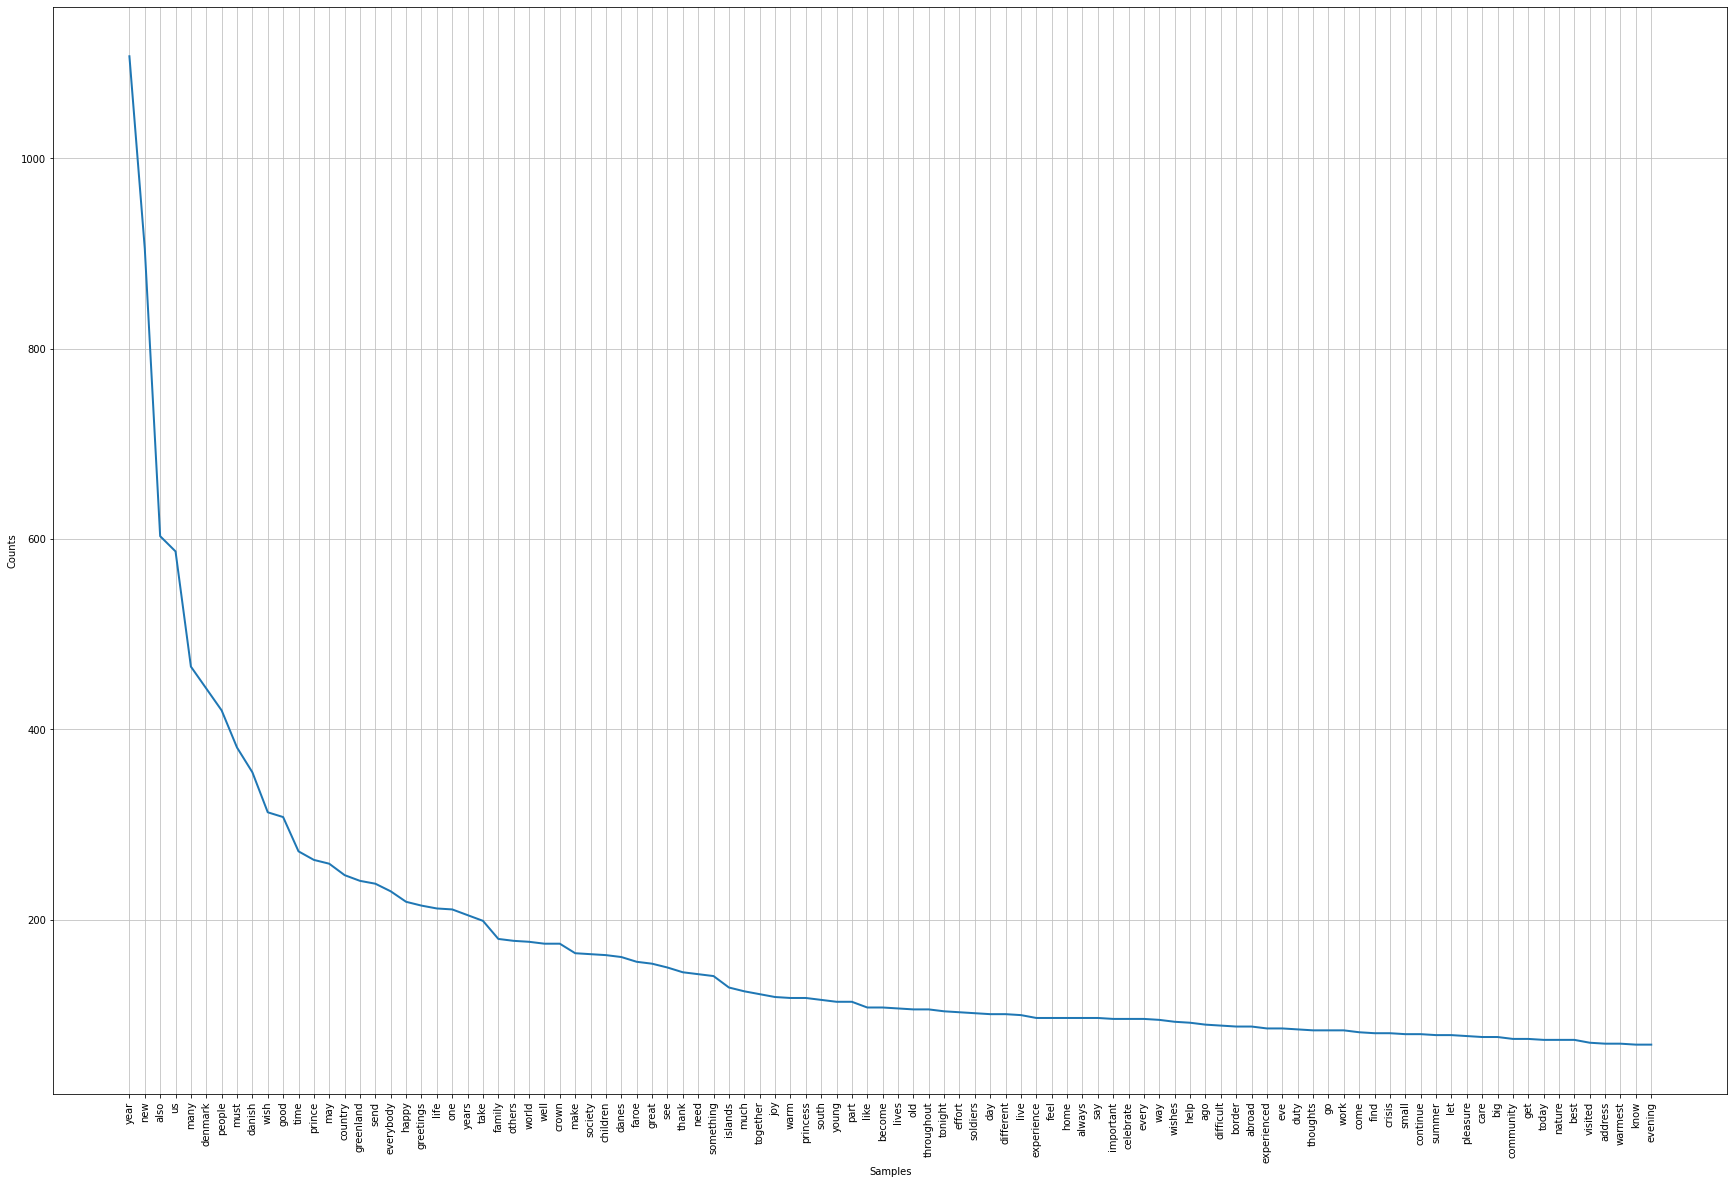

In [53]:
# And finally, here we're going to implement a simple chart to analyze our data after scrapping and processing it
plt.figure(figsize=(30, 20))

FreqDist(finalWords).plot(100)